#                              $ \textbf{CS 4268}   \quad \quad\quad  \quad \quad\quad  \quad \quad\quad  \quad \quad\quad \quad\quad \quad \textbf{Quantum Computing}$
##  $ \quad \quad \quad \quad \quad \quad \quad   \textbf{Qiskit Workshop assignment}$ 
### $  \textbf{National University of Singapore} \quad \quad\quad \quad\quad\quad\quad \quad\quad \quad\quad \quad\quad \quad \quad\quad \quad \quad \quad\quad \quad\quad  \quad \quad \quad \textbf{2022}$  $  \textbf{Course Instructor : Rahul Jain} \quad \quad\quad \quad\quad\quad\quad \quad\quad \quad\quad \quad\textbf{TAs : Naresh Boddu, Upendra Kapshikar}$


# Instructions : 


Qiskit assignment questions are different from the other tutorial or assignment questions encountered during the course CS4268. This assignment has 2 questions. In question (1), we will learn how to implement the superdense coding protocol learnt in the class on quantum simulator and IBM quantum computer. In question (2), we implement Grover's algorithm and how it can be used to solve unstructured search problem both on quantum simulator and IBM quantum computer. In both the questions, partial solutions are provided and students are expected to complete the solutions as part of assignment. Students must not modify anything other than the places where you see: "<font color='orange'>Please insert code in the cell below</font>". You must complete your code and submit the entire jupyter notebook to LumiNUS. The assignment will be due by 11:59 pm, May 2, 2022 (Monday).

# Resources : 

- Instructions/Documentation to install qiskit on local machine :  https://qiskit.org/documentation/getting_started.html

- Youtube Video Series on Qiskit : https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY 

- Qiskit textbook: https://qiskit.org/textbook/preface.html

- IBM Quantum Experience to use Qiskit on cloud : https://quantum-computing.ibm.com/ 

 

# Accessing Notebook via IBM Quantum Experience : 


1) Open IBM Quantum Experience using the link : https://quantum-computing.ibm.com/ .

2) SignIn to IBM Quantum Experience using email-id and password registered.

3) Click on Menu --> (Quantum) Lab.

4) Click on Upload file and Select downloaded CS4268_Assignment_Coding.ipynb file. 

5) Complete the assignment and save the file as StudentID.ipynb.

6) Upload the saved file to LumiNUS.


## Questions

1. [Quantum Superdense coding Question ](#qtel) 
2. [Grovers Algorithm Question](#qgrover)





# 1 . Quantum Superdense Coding  - 18 points <a id='qtel'></a>




## Contents

1. [Overview](#overview) 
2. [Preparing a EPR state and obtain its measurement statistics](#how1)  
    2.1 [Run on statevector simulator](#testing1)   
    2.2 [Run on QASM simulator](#testing2)  
3. [The Quantum Superdense Coding Protocol](#how)       
    3.1 [Simulating the superdense coding protocol using the QASM Simulator](#simulating)      
    3.2 [Superdense coding protocl on a real quantum computer](#real_qc)    
      
4. [References](#references)



## 1. Overview <a id='overview'></a>


In the superdense coding protocol, Alice sends two bits of classical information to Bob sending a single qubit to Bob and using Bell pair which is shared between them. In this assignment, we will implement superdense coding protocol. That is, suppose Alice and Bob share a pure state $\vert\psi\rangle_{AB} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$ which is entangled. Let $R_1R_2$ be single bit classical messages. Now Alice and Bob perform the superdense protocol to send classical bits
$R_1R_2$ from Alice to Bob, using their shared Bell state $\vert\psi\rangle_{AB}$.  We first use Qiskit's built-in simulators to test our quantum circuit, and then try it out on IBM quantum computer.








In [1]:
# Do the necessary imports
import numpy as np
from qiskit import *      # importing qiskit library 
from qiskit.visualization import * #for visualization of measurement statistics
import qiskit.tools.jupyter       # import handy jupyter tools for viewing backend details and monitor job status




## 2. Preparing a EPR state and obtain its measurement statistics <a id='how1'></a>
We create EPR state $\vert\psi\rangle_{AB} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$ in this step. Let us say first qubit $q_0$ is with Alice and second qubit $q_1$ is with Bob. 

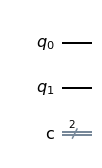

In [2]:
qc_epr = QuantumCircuit(2,2)
qc_epr.draw(output='mpl')


## <font color='orange'>Please insert code in the cell below (3 points) </font>

In [3]:
# Creating the following circuit to prepare EPR state in qubits q_0, q_1 :
##       ┌───┐          
#q_0: |0>┤ H ├──■────
 #       └───┘┌─┴─┐  
#q_1: |0>─────┤ X ├──
#             └───┘

 #c_0: 0 ════════════
 #                      
# c_1: 0 ══════════
#                       
                       
# (Please insert your code below) :  (3 points)

# Insert your one line code to perform hadamard on qubit 0
qc_epr.h(0)

 # Insert your one line code to perform cnot gate on qubit 1 with control on qubit 0.
qc_epr.cx(0,1)


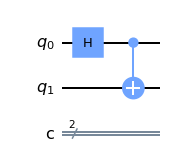

In [4]:
qc_epr.draw(output='mpl')

In [5]:
#At this point, you should see the following circuit diagram after executing "qc_epr.draw(output='mpl')" :
#   
##       ┌───┐          
#q_0: |0>┤ H ├──■─────
 #       └───┘┌─┴─┐  
#q_1: |0>─────┤ X ├──
#             └───┘

 #c_0: 0 ═══════════════
 #                      
# c_1: 0 ═══════════════
#                       

### 2.1 Run on statevector simulator <a id='testing1'></a>
We created EPR state in qubits q_0, q_1. Now, we simulate the quantum circuit using 'statevector_simulator' and see the density matrix of the output state

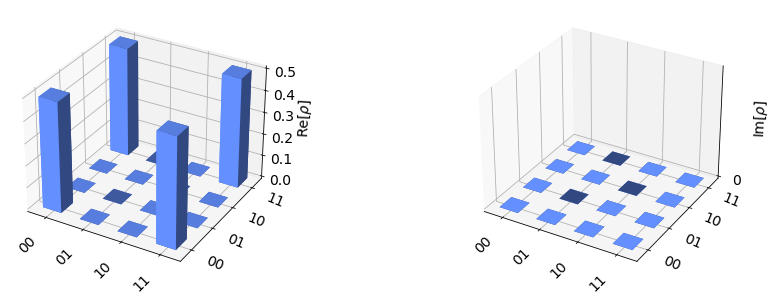

In [5]:
statevector_simulator = Aer.get_backend('statevector_simulator')
result = execute(qc_epr, statevector_simulator).result()
statevector = result.get_statevector()
plot_state_city(statevector)

### 2.2 Run on QASM simulator <a id='testing2'></a>
Now, we simulate the quantum circuit using 'QASM  simulator'. 

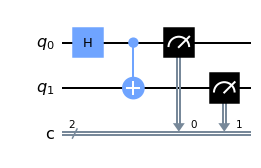

In [6]:
# in order to run on QASM simulator, you first need to measure the qubits
qc_epr.measure([0,1],[0,1])  # command to measure qubits q_0,q_1 and store the results in registers c_0, c_1.
qc_epr.draw(output='mpl')   

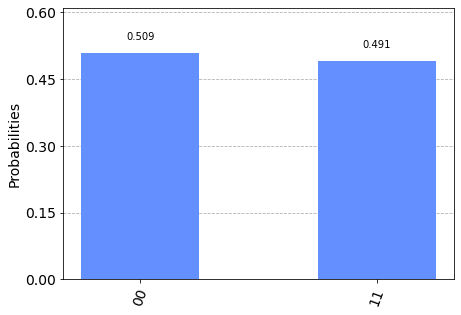

In [7]:
#  Code to run the quantum circuit using QASM simulator using shot number and plot the histogram of counts
# 1: We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.
# 2: We execute the quantum circuit 'qc_epr' using QASM simulator backend, with shots=1000 and store the results in a variable called 'result'.
# 3: get shot counts from vaiable 'result'
# 4: plot histogram of counts

qasm_simulator = Aer.get_backend('qasm_simulator')        
result = execute(qc_epr, qasm_simulator, shots=1000).result() 
counts = result.get_counts()                             
plot_histogram(counts)                                   


#At this point, you should see the histogram plot with 00 - close to 0.5 and 11- close to 0.5. 


## 3. The Quantum SuperDense Coding Protocol <a id='how'></a>

Let us denote classical bits be message$=R_1R_2$ and we copy them to qubits $q_0$ and $q_1$. We prepare a pure state $\vert\psi\rangle_{AB} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$ in qubits $q_2$ and $q_3$. Alice holds the first qubit $q_2$ and Bob holds the 2nd qubit of $\vert\psi\rangle_{AB}$, i.e $q_3$. Also Alice wants to send two classical bits $q_0$ and $q_1$. Now Alice and Bob perform the superdense protocol to send classical message to Bob using the EPR state $\vert\psi\rangle_{AB}$. We first use Qiskit's built-in simulators to test our quantum circuit, and then try it out on a real quantum computer.

Follow below steps to complete the implementation:

#### Step 1
We use the below function to copy message$=R_1R_2$ to $q_0$ and $q_1$




In [15]:
message = "11"

In [16]:
qc_superdense = QuantumCircuit(4, 2)

In [17]:
def prepare_message(qc, qubit0, qubit1, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit0) # To prepare 10 we apply an X-gate to first qubit
    elif msg == "01":
        qc.x(qubit1) # To prepare 01 we apply a X-gate to second qubit
    elif msg == "11":
        qc.x(qubit0) # To prepare 11, we apply a X-gate to first and second qubit
        qc.x(qubit1) 
    else:
        print("Invalid Message: Sending '00'")

## <font color='orange'>Please insert code in the cell below (3 points) </font>

In [18]:

# Initialize classical message in qubits 0,1.
# Qubits q_0, q_1 are with Alice.

# (Please insert your code below) :     

# Insert one line code to copy message="11" to qubits $q_0$, $q_1$
prepare_message(qc_superdense, 0,1, "11")


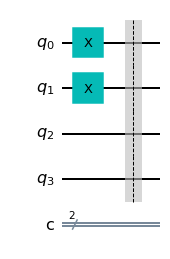

In [19]:
qc_superdense.barrier()
qc_superdense.draw(output='mpl')

#### Step 2
We use the below function to create EPR state 


In [20]:
def create_epr(qc, a, b): # function to create quantum circuit to prepare EPR state.
    qc.h(a)                  # applies hadamard on qubit specified by a
    qc.cx(a,b)               # applies cnot on qubit specified by b with control on qubit specified by a

## <font color='orange'>Please insert code in the cell below (3 points)</font>

In [21]:
# Initialize state in qubits 2,3 to EPR state.
# Qubits q_2, q_3 are with Alice and Bob.

# (Please insert your code below) :     

# insert your one line code to create a EPR state in qubit 2, qubit 3  #

create_epr(qc_superdense, 2,3)






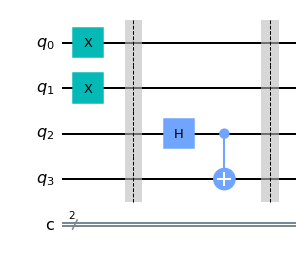

In [22]:
qc_superdense.barrier()
qc_superdense.draw(output='mpl')

#### Step 3
#We use the below function to encode classical messages into qubit $q_2$

In [24]:
def encode_message(qc, qubit0, qubit1, qubit2):
    qc.cx(qubit0,qubit2)
    qc.cz(qubit1,qubit2)

## <font color='orange'>Please insert code in the cell below (3 points)</font>

In [25]:
# Initialize state in qubits 2,3 to EPR state.
# Qubits q_2, q_3 are with Alice and Bob respectively

# (Please insert your code below) :     

# insert your one line code to create a encode classical message in qubit 2
encode_message(qc_superdense, 0, 1, 2)



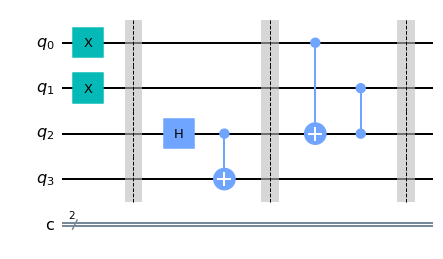

In [26]:
qc_superdense.barrier()
qc_superdense.draw(output='mpl')

#### Step 4
Bob receives qubit $q_2$ from Alice and decodes by applying a unitary on qubits $q_2$ and $q_3$ and measuring them.

In [27]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

## <font color='orange'>Please insert code in the cell below (3 points)</font>

In [28]:
# Now let us begin the teleportation protocol
 # Insert one line code to apply decode message unitary by Bob
decode_message(qc_superdense, 2, 3)


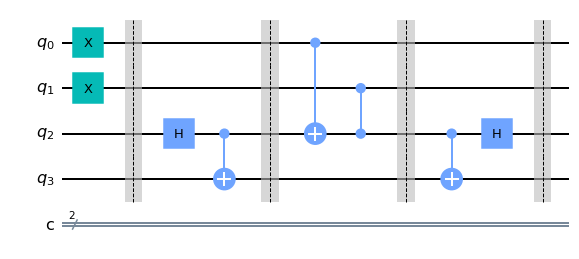

In [29]:
qc_superdense.barrier()
qc_superdense.draw(output='mpl')

#### Step 5

Bob measures his qubits $q_2$ and $q_3$ in computational basis to receive the 2 classical bits Alice sent.  

In [30]:
def measure(qc, c, d):  # function that measures in superdense protocol
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.measure(c,0)
    qc.measure(d,1)

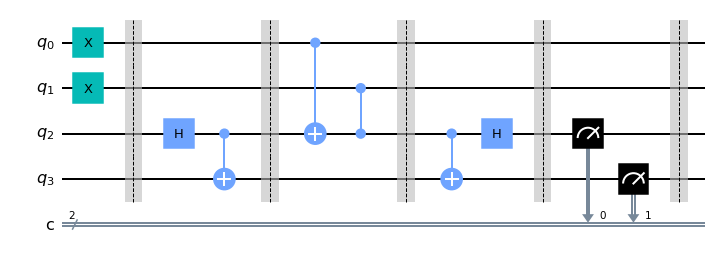

In [31]:
# Let's apply this to our circuit:
measure(qc_superdense, 2, 3)
qc_superdense.barrier() # Use barrier to separate steps
qc_superdense.draw(output='mpl')

And voila! At the end of this protocol, Bob's measurement outcome will be same as initial message Alice intended to send to Bob.

## 3.1 Simulating the Superdense Protocol using the QASM Simulator <a id='simulating'></a>

## <font color='orange'>Please insert code in the cell below (3 points)</font>

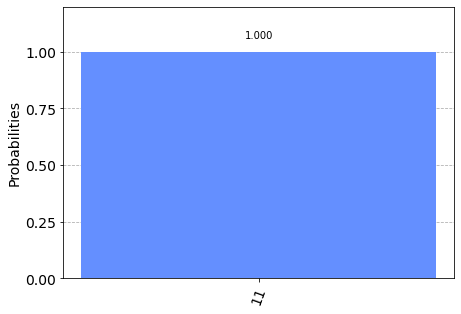

In [32]:
# Code to run the quantum circuit using QASM simulator using shot number and plot the histogram of counts
# 1: We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.
# 2: We execute the quantum circuit 'qc_superdense' using QASM simulator backend, with shots=1000 and store the results in a variable called 'result'.
# 3: get shot counts from vaiable 'result'
# 4: plot histogram of counts

# (Please insert your code below) :   

  # Insert your one line code to get 'qasm_simulator' backend.#
# Insert your one line code to execute the quantum circuit 'qc_teleport' using 'qasm_simulator' backend, with shots=1000 and store the results in a variable called 'result'.#
 # Insert your one line code to get shot counts from job 'result'.#
     # Insert your one line code to plot histogram of shot counts. #

qasm_simulator = Aer.get_backend('qasm_simulator')        
result = execute(qc_superdense, qasm_simulator, shots=1000).result() 
counts = result.get_counts()                             
plot_histogram(counts)



## 3.2 Superdense coding on a Real Quantum Computer <a id='real_qc'></a>

In [33]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [31]:
import qiskit.tools.jupyter # import handy jupyter tools for viewing backend details and monitor job status

%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [32]:
# get the least-busy backend at IBM Quantum Experience
from qiskit.providers.ibmq import least_busy
device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                   not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

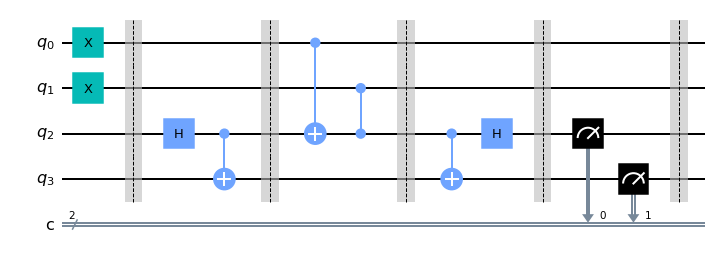

In [33]:
qc_superdense.draw(output='mpl')

In [34]:
job_exp = execute(qc_superdense, device, shots=1000)

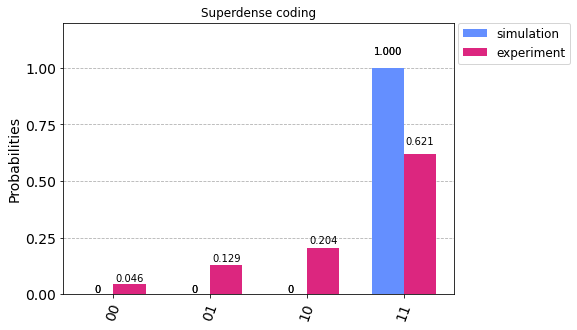

In [35]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts()
figure = plot_histogram([counts, counts_exp], 
                        title='Superdense coding', legend=['simulation', 'experiment'])
figure
# wait for a while (around 3-5 mins) until the job is run on quantum computer. 

In [36]:
# Notice that the measurement statistics of qubits 2,3 (q_2 is sent to Bob) 


In [37]:
# adjust figure size so that the legend won't be cutoff after export
figure.subplots_adjust(right=0.75)
figure.savefig(fname='Superdense_coding.pdf', format='pdf')

In [38]:
%qiskit_disable_job_watcher

## 6. References <a id='references'></a>
[1] M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).

[2] Qiskit textbook chapter on quantum superdense coding : https://qiskit.org/textbook/ch-algorithms/superdense-coding.html

# 2. Grover Algorithm Question - 7 points <a id='qgrover'></a>


## Contents

1. [Introduction](#introduction)
2. [ Grover's algorithm with 2 qubits and 1 marked element](#2qubits)    
   2.1 [Run on QASM Simulators](#2qubits-simulation)    
   2.2 [Run on IBM Quantum Computer](#2qubits-device)     
3. [References](#references)


## 1. Introduction <a id='introduction'></a>

We have learnt in class that Grover's algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the amplitude amplification trick.

### Unstructured Search

Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the marked item $a$. To find the *marked item* -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is indeed a substantial time-saver for finding marked items in long lists. Additionally, the algorithm does not use the list's internal structure, which makes it *generic;* this is why it immediately provides a quadratic quantum speed-up for many classical problems.

### Oracle

How will the list items be provided to the quantum computer? A common way to encode such a list is in terms of a function $f$ which returns $f(x) = 0$ for all unmarked items $x$ and $f(a) = 1$ for the marked item. To use a quantum computer for this problem, we must provide the items in superposition to this function, so we encode the function into a unitary matrix called an *oracle*. First we choose a binary encoding of the items $x, a \in \{0,1\}^n$ so that $N = 2^n$; now we can represent it in terms of qubits on a quantum computer. Then we define the oracle matrix $U_f$ to act on any of the simple, standard basis states $| x \rangle$ by $U_f | x \rangle = (-1)^{f(x)}  |  x \rangle.$

We see that if $x$ is an unmarked item, the oracle does nothing to the state. However, when we apply the oracle to the basis state $| a \rangle$, it maps $U_f | a \rangle = -| a \rangle$. Geometrically, this unitary matrix corresponds to a reflection about the origin for the marked item in an $N = 2^n$ dimensional vector space.


### Grover Iterations

So how does the algorithm work? Before looking at the list of items, we have no idea where the marked item is. Therefore, any guess of its location is as good as any other, which can be expressed in terms of a
uniform superposition: $|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x
\rangle.$

If at this point we were to measure in the standard basis $\{ | x \rangle \}$, this superposition would collapse, according to the fifth quantum law, to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^n}$. Our chances of guessing the right value $a$ is therefore $1$ in $2^n$, as could be expected. Hence, on average we would need to try about $N = 2^n$ times to guess the correct item.

After performing Grover Iterations, which is how a quantum computer significantly enhances this probability. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitude, so that measuring the final state will return the right item with near-certainty. 

This algorithm has a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. The only two special states we need to consider are the marked element $| a \rangle$ and the uniform superposition $| s \rangle$. These two vectors span a two-dimensional plane in the vector space $\mathbb{C}^N.$ They are not quite perpendicular because $| a \rangle$ occurs in the superposition with amplitude $N^{-1/2}$ as well. We can, however, introduce an additional state $|s'\rangle$ that is in the span of these two vectors, which is perpendicular to $| a \rangle$ and is obtained from $|s \rangle$ by removing $| a \rangle$ and
rescaling. 

**Step 1**: The Grovers algorithm starts out in the uniform superposition $| s \rangle$, which is easily constructed from $| s \rangle = H^{\otimes n} | 0 \rangle^n$. The state $| s \rangle$ corresponds to the two-dimensional plane spanned by perpendicular vectors $|a\rangle$ and $|s'\rangle$ which is expressed as $|s\rangle = \sin \theta | a \rangle + \cos \theta | s' \rangle,$ where $\theta = \arcsin \langle s | a \rangle = \arcsin \frac{1}{\sqrt{N}}$. 

**Step 2**: We apply the oracle reflection $U_f$ to the state $|s\rangle$. Geometrically this corresponds to a reflection of the state $|s\rangle$ about $|s'\rangle$. This transformation means that the amplitude in front of the $|a \rangle$ state becomes negative, which in turn means that the average amplitude has been lowered.

**Step 3**: We now apply an additional reflection $U_s$ about the state $|s\rangle$: $U_s = 2|s\rangle\langle s| - \mathbb{1}$. This transformation maps the state to $U_s U_f| s \rangle$ and completes the transformation.Two reflections always correspond to a rotation. The transformation $U_s U_f$ rotates the initial state $|s\rangle$ closer towards the marked element $|a\rangle$. We then go to **step 2** to repeat the application. This procedure will be repeated several times to zero . 

After $t$ steps we will be in the state $|\psi_t\rangle$ where: $| \psi_t \rangle = (U_s U_f)^t  | s \rangle.$

How many times do we need to apply the rotation? It turns out that roughly $\sqrt{N}$ rotations suffice. This becomes clear when looking at the amplitudes of the state $| \psi \rangle$. We can see that the amplitude of $| a \rangle$ grows linearly with the number of applications $\sim t N^{-1/2}$. However, since we are dealing with amplitudes and not probabilities, the vector space's dimension enters as a square root. Therefore it is the amplitude, and not just the probability, that is being amplified in this procedure.

In the case that there are multiple solutions, $M$, it can be shown that roughly $\sqrt{(N/M)}$ rotations will suffice.



## 2.  Grover's algorithm with 2 qubits and 1 marked element <a id='2qubits'></a>

Let's first have a look at the case of Grover's algorithm for $N=4$ which is realized with 2 qubits. In this particular case, contrary to inuition, only <b>one rotation</b> is required which will rotate the initial state $|s\rangle$ to the marked element $|a\rangle$ which can easily be shown [3]. Now let us look into the possible oracles. We have $N=4$ possible elements being marked, i.e. $\lvert 00 \rangle, \lvert 01 \rangle, \lvert 10 \rangle, \lvert 11 \rangle$ and hence require in total $4$ oracles.<br>

#### Oracle for $\lvert a \rangle = \lvert 11 \rangle$
Let us start with the case $\lvert a \rangle = \lvert 11 \rangle$. The oracle $U_f$ in this case acts as follows: 

$$U_f \lvert s \rangle = U_f\frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle - \lvert 11 \rangle \right).$$

In order to realize the sign flip for $\lvert 11 \rangle$ we simply need to apply a controlled Z gate to the initial state. 



#### Oracle for $\lvert a \rangle = \lvert 00 \rangle$
In the case of $\lvert a \rangle = \lvert 00 \rangle$ the oracle $U_f$ acts as follows: 

$$U_f \lvert s \rangle = U_f\frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( -\lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right).$$

In order to realize the sign flip for $\lvert 00 \rangle$ we need to apply an "inverted" controlled Z gate to the initial state.



#### Oracles for $\lvert a \rangle = \lvert 01 \rangle$ and $\lvert a \rangle = \lvert 10 \rangle$
Following the above logic one can straight forwardly construct the oracles for $\lvert a \rangle = \lvert 01 \rangle$ (left circuit) and $\lvert a \rangle = \lvert 10 \rangle$ (right circuit):



#### Reflection $U_s$
In order to complete the circuit we need to implement the additional reflection $U_s = 2|s\rangle\langle s| - \mathbb{1}$.



#### Full Circuit for $\lvert a \rangle = \lvert 10 \rangle$
Since in the particular case of $N=4$ only one rotation is required we can combine the above components to build the full circuit for Grover's algorithm for the case $\lvert a \rangle = \lvert 10 \rangle$:




### 2.1 Qiskit Implementation

We now implement Grover's algorithm for the case when the marked item is  $\lvert a \rangle = \lvert 10 \rangle$.

In [46]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [47]:
# We start the quantum circuit on 2 quantum registers and 2 classical registers

In [48]:
num_qr = 2
num_cr = 2
grover_circuit = QuantumCircuit(num_qr,num_cr)

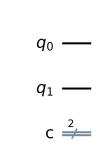

In [49]:
grover_circuit.draw(output='mpl')  

In [50]:
#At this point, you should see the following circuit diagram : 
#   
        
# q_0: |0>
        
# q_1: |0>
        
# c_0: 0 
        
# c_1: 0 

In [51]:
# We use the below function to apply Hadamard on all qubits 

In [52]:
def hadamard_all(qc):
    for qubit in range(qc.num_qubits):
        qc.h(qubit)
    qc.barrier()

In [53]:
# We use the below function to provide query access to $U_f$

## <font color='orange'>Please insert code in the cell below (7 points)</font>

In [54]:
# Query access to U_f when marked element |a> is |00>.
#def oracle(qc):   
 #   qc.x(0)
 #   qc.x(1)
 #  qc.cz(0,1)
 #  qc.x(0)
 #   qc.x(1)
 #  qc.barrier()
    

# Code to provide query access to U_f when marked element |a> is |10>.
#  U_f |10> = (-1)|10> and U_f |ab> = |ab> otherwise for a,b in {0,1} & ab != 10. 

# (Please insert your code below) :   (7 points)

def oracle(qc):
     # Insert your code to provide query access to U_f when marked element |a> is |10>.#
     # Insert your code to provide query access to U_f when marked element |a> is |10>.#
     # Insert your code to provide query access to U_f when marked element |a> is |10>.#  
     qc.x(0)
     qc.cz(0,1)                          
     qc.x(0)
     qc.barrier()    

In [55]:
# We use the below function to provide unitary access to $U_s$

In [56]:
def reflection(qc):
    for qubit in range(qc.num_qubits):
        qc.h(qubit)
    for qubit in range(qc.num_qubits):
        qc.z(qubit)
    qc.cz(0,1)
    for qubit in range(qc.num_qubits):
        qc.h(qubit)
    qc.barrier()

In [57]:
# Constructing the circuit for grovers algorithm. 

In [58]:
hadamard_all(grover_circuit)

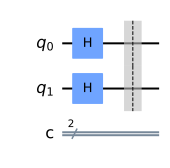

In [59]:
grover_circuit.draw(output='mpl') 

In [60]:
#At this point, you should see the following circuit diagram : 
#   
        
 #       ┌───┐ ░ 
#q_0: |0>┤ H ├─░─
#        ├───┤ ░ 
#q_1: |0>┤ H ├─░─
#        └───┘ ░ 
# c_0: 0 ════════
#                
# c_1: 0 ════════

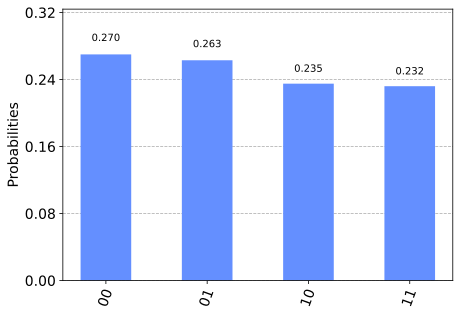

In [61]:
oracle(grover_circuit)
grover_circuit.draw(output='mpl') 


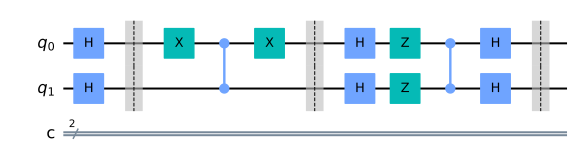

In [40]:
reflection(grover_circuit)
grover_circuit.draw(output='mpl') 

We have completed one grover iteration. 

In [41]:
grover_circuit.measure([0,1],[0,1])  # command to measure qubits q_0,q_1 and store the results in registers c_0, c_1.

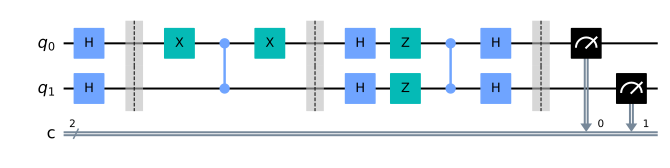

In [42]:
grover_circuit.draw(output='mpl') 

In [43]:
#At this point, you should see the circuit diagram similar to this with slightly different U_f (U_f is given when 00 is marked element below) : 
#                     U_f               reflection
#        ┌───┐ ░ ┌───┐   ┌───┐ ░ ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
#q_0: |0>┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
#        ├───┤ ░ ├───┤ │ ├───┤ ░ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
#q_1: |0>┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
 #       └───┘ ░ └───┘   └───┘ ░ └───┘└───┘   └───┘ ░  ║ └╥┘
# c_0: 0 ══════════════════════════════════════════════╩══╬═
#                                                         ║ 
# c_1: 0 ═════════════════════════════════════════════════╩═

### 2.1.1 Run on QASM Simulators <a id='2qubits-simulation'></a>

Let's run the circuit using 'qasm_simulator' . 

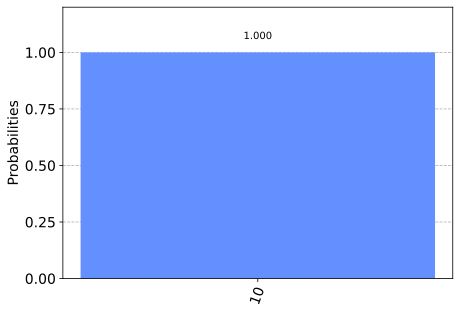

In [45]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job_sim = execute(grover_circuit, qasm_simulator, shots=1000)
counts_sim = job_sim.result().get_counts()
plot_histogram(counts_sim)

We confirm that in 100% of the cases the element $|10\rangle$ is found.

### 2.1.2 Run on Quantum Computer <a id='2qubits-device'></a>

We can run the circuit on the real device as below.

In [60]:
# Load IBM Q account and get the least busy backend device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2022-03-30 01:33:34,681: Credentials are already in use. The existing account in the session will be replaced.


In [61]:
# get the least-busy backend at IBM Quantum Experience
from qiskit.providers.ibmq import least_busy
device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and
                                   not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [62]:
import qiskit.tools.jupyter # import handy jupyter tools for viewing backend details and monitor job status

%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [63]:
job_exp = execute(grover_circuit, device, shots=1000)

In [64]:
counts_exp = job_exp.result().get_counts()

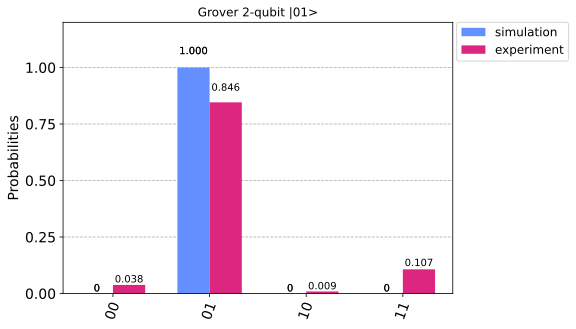

In [65]:
plot_histogram([counts_sim, counts_exp], title='Grover 2-qubit |01>', legend=['simulation', 'experiment'])

We confirm that in the majority of the cases the element $|10\rangle$ is found. The other results are due to errors in the quantum computation. 

In [66]:
%qiskit_disable_job_watcher

## 3. References <a id='references'></a>

[1] L. K. Grover (1996), "A fast quantum mechanical algorithm for database search", Proceedings of the 28th Annual ACM Symposium on the Theory of Computing (STOC 1996), [doi:10.1145/237814.237866](http://doi.acm.org/10.1145/237814.237866), [arXiv:quant-ph/9605043](https://arxiv.org/abs/quant-ph/9605043)

[2] C. Figgatt, D. Maslov, K. A. Landsman, N. M. Linke, S. Debnath & C. Monroe (2017), "Complete 3-Qubit Grover search on a programmable quantum computer", Nature Communications, Vol 8, Art 1918, [doi:10.1038/s41467-017-01904-7](https://doi.org/10.1038/s41467-017-01904-7), [arXiv:1703.10535 ](https://arxiv.org/abs/1703.10535)

[3] I. Chuang & M. Nielsen, "Quantum Computation and Quantum Information", Cambridge: Cambridge University Press, 2000.

[4] Qiskit textbook chapter on Grover's algorithm: https://qiskit.org/textbook/ch-algorithms/grover.html